In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DSMT/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [4]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [5]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [6]:
duplicate_rows = df[df.duplicated()]

if duplicate_rows.shape[0] == 0:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(exclude=['object']).columns

print("Categorical: ",categorical_columns)
print("Categorical Column Count:", len(categorical_columns))

print("\nNumeric",numeric_columns)
print("Numeric Column Count:", len(numeric_columns))

Categorical:  Index(['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
       'Equinox'],
      dtype='object')
Categorical Column Count: 4

Numeric Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mea

In [8]:
df.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
E

<ipython-input-9-797c08fcdabc>:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette=pastel_palette, ax=axes[i], legend=False)
<ipython-input-9-797c08fcdabc>:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette=pastel_palette, ax=axes[i], legend=False)


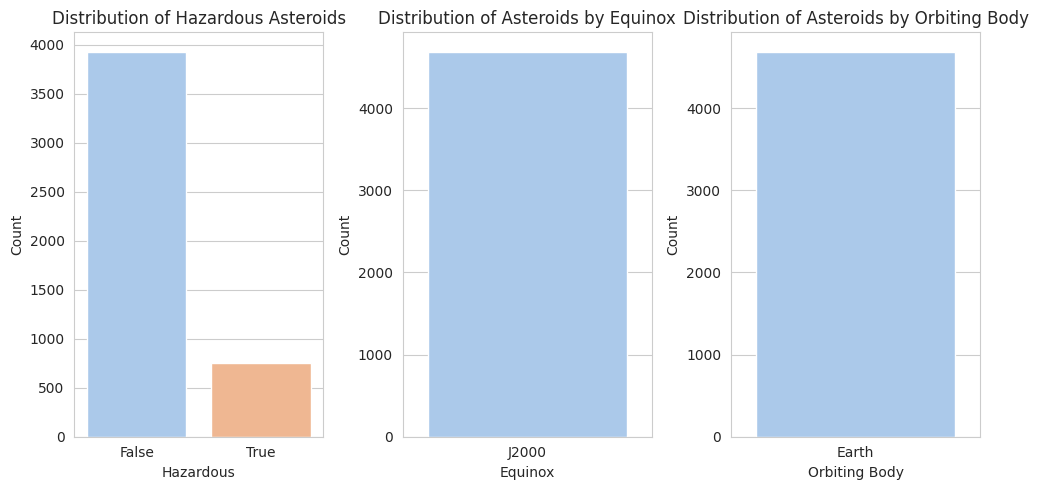

In [9]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Define pastel color palette
pastel_palette = sns.color_palette("pastel")[:2]

# Define columns and titles
columns = ['Hazardous', 'Equinox', 'Orbiting Body']
titles = ['Distribution of Hazardous Asteroids',
          'Distribution of Asteroids by Equinox',
          'Distribution of Asteroids by Orbiting Body']

# Plotting loop
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # Creating a figure with 1 row and 3 columns
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, hue=column, palette=pastel_palette, ax=axes[i], legend=False)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

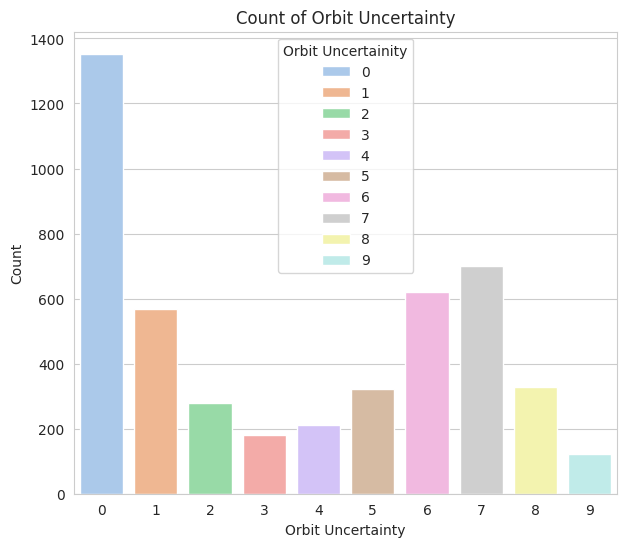

In [10]:
palette = sns.color_palette("pastel", len(df['Orbit Uncertainity'].unique()))

# Create the count plot
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='Orbit Uncertainity', hue="Orbit Uncertainity", palette=palette)
plt.title('Count of Orbit Uncertainty')
plt.xlabel('Orbit Uncertainty')
plt.ylabel('Count')
plt.show()

In [11]:
# Delete duplicate columns.
# Use Name instead of Neo Reference ID.
# Use Mile unit instead of other units.
# Use Miles per hour only in velocity.
# Dropping Equinox and Orbiting Body since it has just one value and it will not help to predict the target variable

df.drop(["Neo Reference ID", "Est Dia in KM(min)", "Est Dia in KM(max)", "Est Dia in M(min)", "Est Dia in M(max)",
         "Est Dia in Feet(min)", "Est Dia in Feet(max)", "Relative Velocity km per sec",
         "Miss Dist.(Astronomical)", "Miss Dist.(lunar)", "Miss Dist.(kilometers)", "Equinox","Orbiting Body" ], axis = 1, inplace = True)

# df['Hazardous'] = df['Hazardous'].astype('object')

df.head()

,Name,Absolute Magnitude,Est Dia in Miles(min),Est Dia in Miles(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(miles),Orbit ID,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,21.6,0.079051,0.176763,1995-01-01,788947200000,22017.003799,13680.509944,38993336.0,17,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,21.3,0.090762,0.202951,1995-01-01,788947200000,65210.346095,40519.173105,35603420.0,21,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,20.3,0.143849,0.321655,1995-01-08,789552000000,27326.560182,16979.661798,4736657.5,22,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,27.4,0.005469,0.012229,1995-01-15,790156800000,40225.948191,24994.839864,26522368.0,7,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,21.6,0.079051,0.176763,1995-01-15,790156800000,35426.991794,22012.954985,37910368.0,25,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [12]:
df.columns

Index(['Name', 'Absolute Magnitude', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

In [13]:
# Convert 'Close Approach Date' to datetime
df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'])

# Extracting year, month, and day from the date
df['Close Approach Year'] = df['Close Approach Date'].dt.year
df['Month'] = df['Close Approach Date'].dt.month
df['Day'] = df['Close Approach Date'].dt.day

# Drop the original 'Close Approach Date' column
df.drop(columns=['Close Approach Date', 'Month', 'Day'], inplace=True)

In [14]:
df[["Orbit Determination Year", "Orbit Determination Month", "Orbit Determination Day"]] = df["Orbit Determination Date"].str.split("-", expand = True)
df.drop(["Orbit Determination Date", "Orbit Determination Month", "Orbit Determination Day"], axis = 1, inplace = True)
df.head()

,Name,Absolute Magnitude,Est Dia in Miles(min),Est Dia in Miles(max),Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(miles),Orbit ID,Orbit Uncertainity,...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,Close Approach Year,Orbit Determination Year
0,3703080,21.6,0.079051,0.176763,788947200000,22017.003799,13680.509944,38993336.0,17,5,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True,1995,2017
1,3723955,21.3,0.090762,0.202951,788947200000,65210.346095,40519.173105,35603420.0,21,3,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False,1995,2017
2,2446862,20.3,0.143849,0.321655,789552000000,27326.560182,16979.661798,4736657.5,22,0,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True,1995,2017
3,3092506,27.4,0.005469,0.012229,790156800000,40225.948191,24994.839864,26522368.0,7,6,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False,1995,2017
4,3514799,21.6,0.079051,0.176763,790156800000,35426.991794,22012.954985,37910368.0,25,1,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True,1995,2017


In [15]:
df.columns

Index(['Name', 'Absolute Magnitude', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Epoch Date Close Approach',
       'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(miles)',
       'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous', 'Close Approach Year', 'Orbit Determination Year'],
      dtype='object')

In [16]:
# plt.figure(figsize = (10, 30))
# for i, col in enumerate(df.columns[1:-1], 1):
#     plt.subplot(8, 3, i)
#     sns.histplot(x = df[col], hue = df["Hazardous"], multiple = "dodge")
#     plt.title(f"Distribution of {col} Data")
#     plt.tight_layout()
#     plt.xticks(rotation = 90)
#     plt.plot()

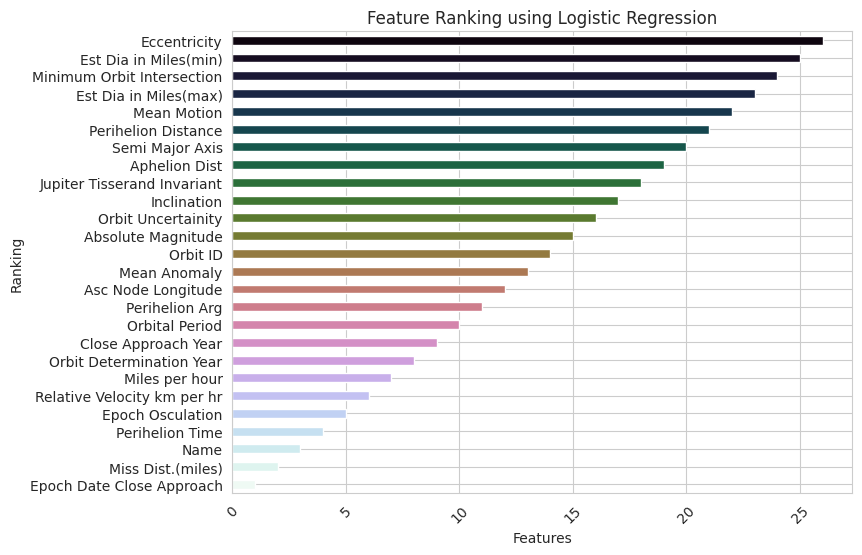

In [17]:
X2 = df[['Name', 'Absolute Magnitude', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Epoch Date Close Approach', 'Miles per hour',
       'Miss Dist.(miles)', 'Orbit ID', 'Orbit Uncertainity', "Relative Velocity km per hr",
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Close Approach Year', 'Orbit Determination Year']]

df['Hazardous'] = df['Hazardous'].astype(int)

y2 = df['Hazardous']

logreg_model = LogisticRegression(max_iter=1000)
from sklearn.feature_selection import RFE
# Initialize RFE with the Logistic Regression model
rfe = RFE(logreg_model, n_features_to_select=1)

# Fit RFE
rfe.fit(X2, y2)

# Get ranking of features
feature_ranking = pd.Series(rfe.ranking_, index=X2.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
colors = sns.color_palette("cubehelix_r", len(feature_ranking))
feature_ranking.plot(kind='barh', color=colors)
plt.title('Feature Ranking using Logistic Regression')
plt.ylabel('Ranking')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.nunique()

Name                           3692
Absolute Magnitude              269
Est Dia in Miles(min)           269
Est Dia in Miles(max)           269
Epoch Date Close Approach       777
Relative Velocity km per hr    4687
Miles per hour                 4687
Miss Dist.(miles)              4660
Orbit ID                        188
Orbit Uncertainity               10
Minimum Orbit Intersection     3678
Jupiter Tisserand Invariant    2495
Epoch Osculation                429
Eccentricity                   3692
Semi Major Axis                3692
Inclination                    3692
Asc Node Longitude             3692
Orbital Period                 3692
Perihelion Distance            3692
Perihelion Arg                 3692
Aphelion Dist                  3692
Perihelion Time                3692
Mean Anomaly                   3692
Mean Motion                    3692
Hazardous                         2
Close Approach Year              22
Orbit Determination Year          4
dtype: int64

In [19]:
df.shape

(4687, 27)

In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns
#numeric_columns = df.select_dtypes(exclude=['object']).columns

print("Categorical: ",categorical_columns)
#print("Categorical Column Count:", len(categorical_columns))

Categorical:  Index(['Orbit Determination Year'], dtype='object')


In [21]:
# Dropping the columns which are of least importance based on the feature importance graph *******************
df.drop(["Orbit Determination Year", "Epoch Date Close Approach", "Name", "Close Approach Year"], axis = 1, inplace = True)

In [22]:
df.shape

(4687, 23)

In [23]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(miles)',
       'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

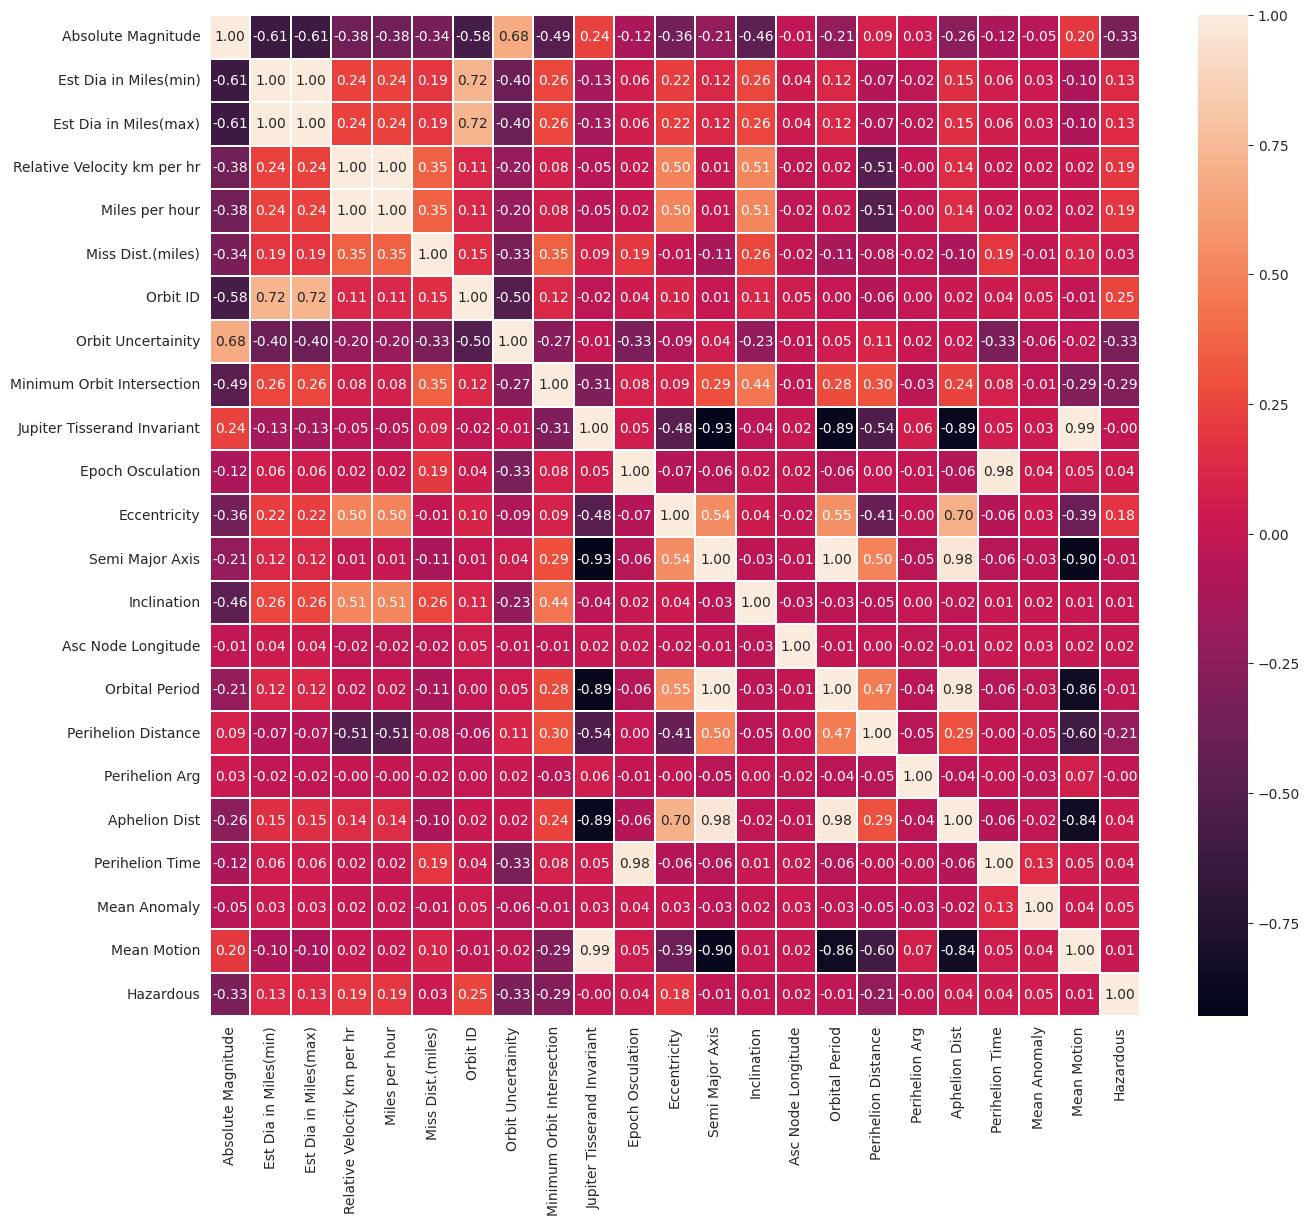

In [24]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True,linewidths=.1,fmt='.2f')
plt.show()

In [25]:
# Droppping semi-major axis since its collinear with multiple columns
df.drop(["Semi Major Axis"], axis = 1, inplace = True)

In [26]:
df.drop(["Relative Velocity km per hr"], axis = 1, inplace = True)

In [27]:
df.drop(["Est Dia in Miles(min)"], axis = 1, inplace = True)

In [28]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in Miles(max)', 'Miles per hour',
       'Miss Dist.(miles)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

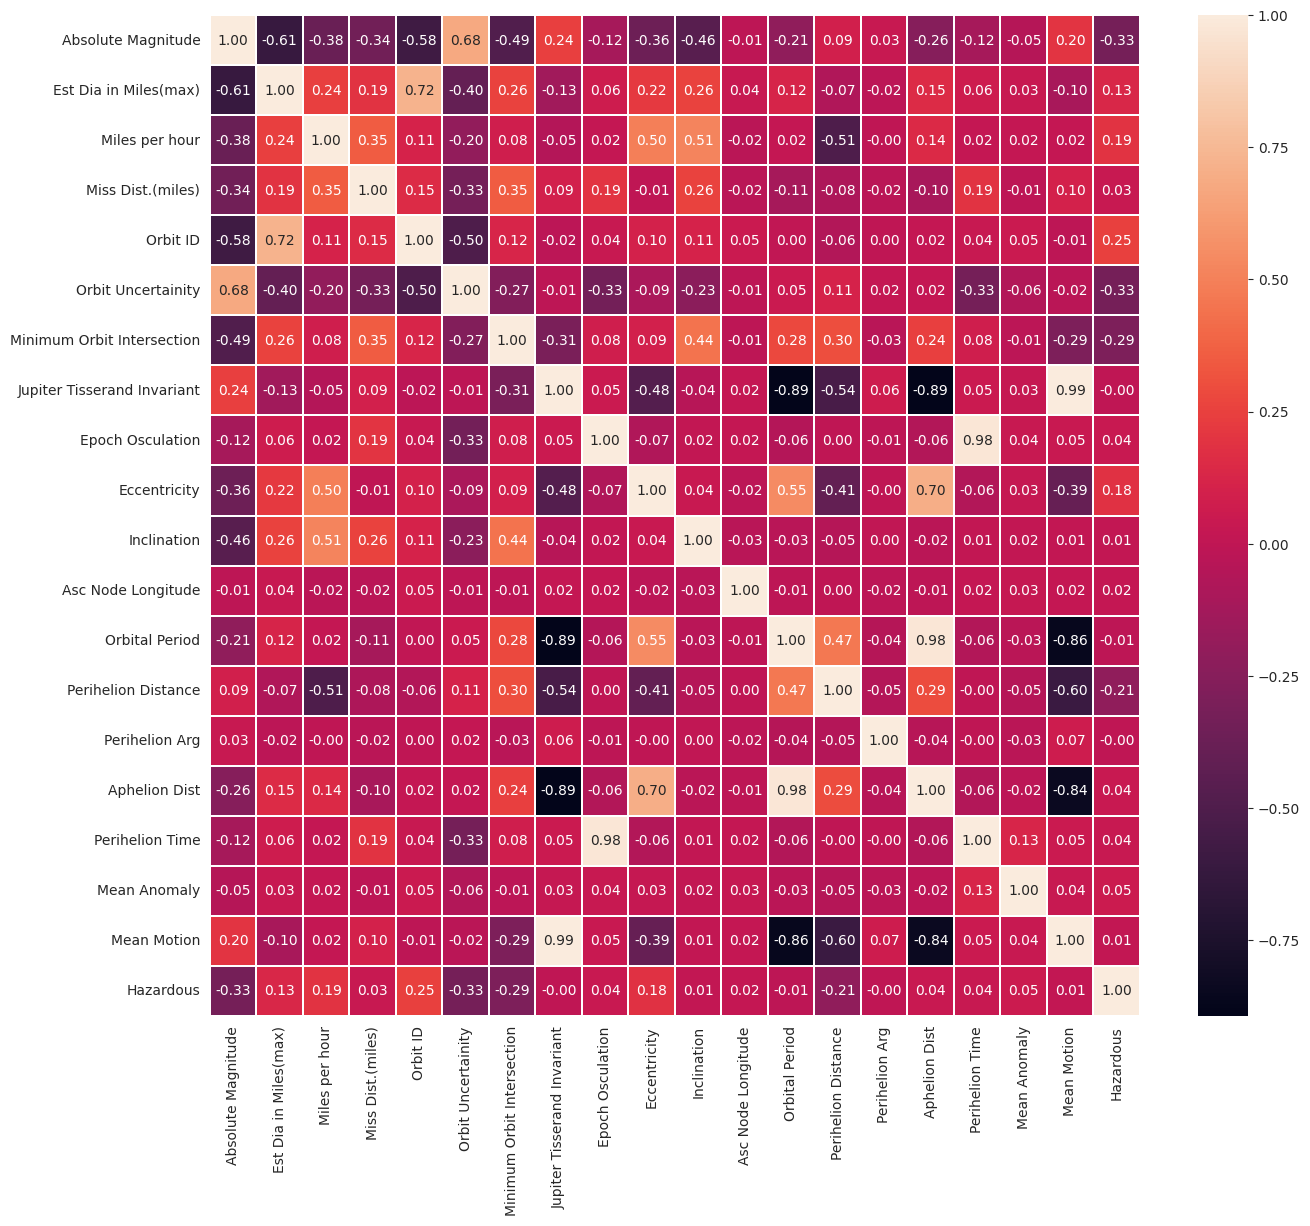

In [29]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True,linewidths=.1,fmt='.2f')
plt.show()

In [30]:
df['Hazardous'].value_counts()

Hazardous
0    3932
1     755
Name: count, dtype: int64

In [31]:
numeric_columns = df.select_dtypes(exclude=['object']).columns
print("\nNumeric",numeric_columns)
print("Numeric Column Count:", len(numeric_columns))


Numeric Index(['Absolute Magnitude', 'Est Dia in Miles(max)', 'Miles per hour',
       'Miss Dist.(miles)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')
Numeric Column Count: 20


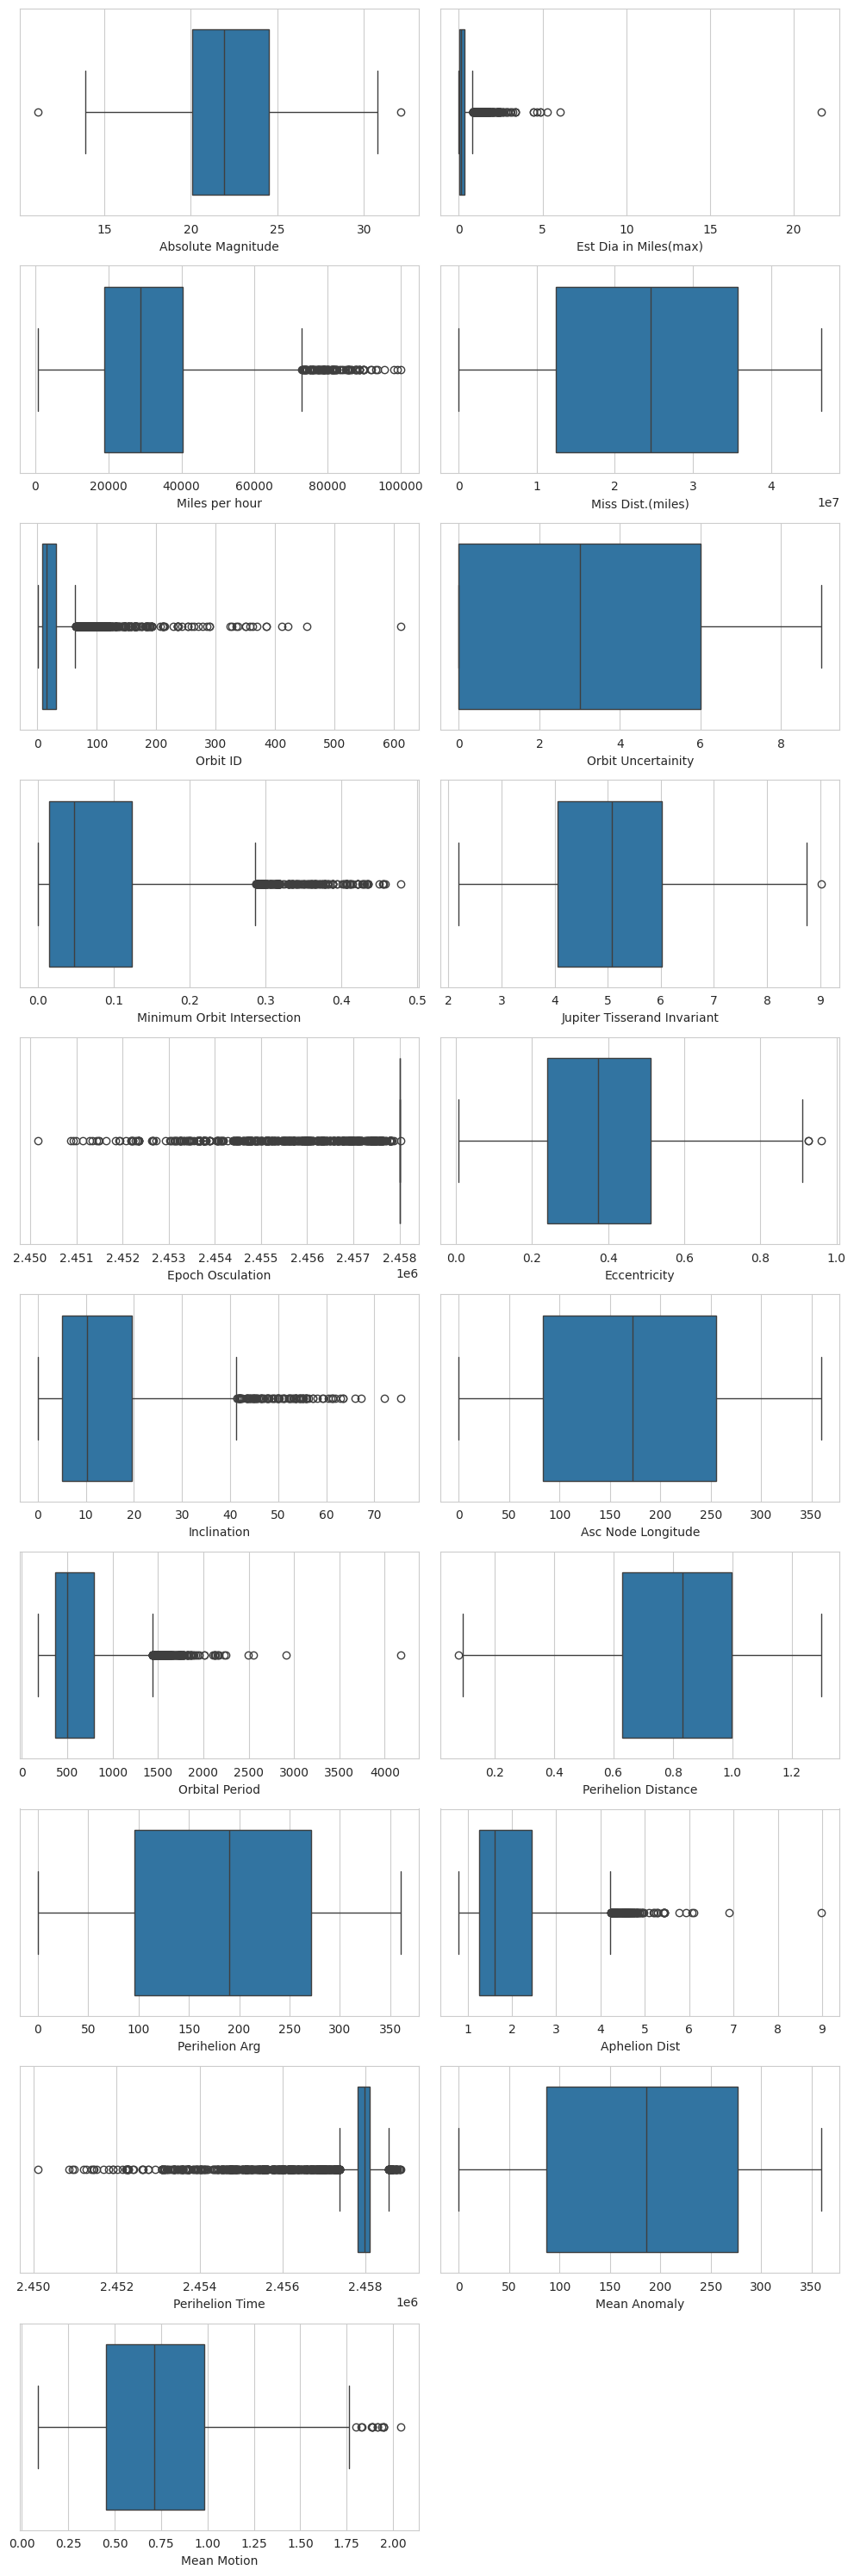

In [32]:
numerical_columns = ['Absolute Magnitude', 'Est Dia in Miles(max)', 'Miles per hour',
                     'Miss Dist.(miles)', 'Orbit ID', 'Orbit Uncertainity',
                     'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
                     'Epoch Osculation', 'Eccentricity', 'Inclination', 'Asc Node Longitude',
                     'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
                     'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']

n_cols = 2
import numpy as np

# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(numerical_columns)/n_cols))

# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()

for i, feature in enumerate(numerical_columns):
    sns.boxplot(data=df, x=feature, ax=ax[i])

# If the number of features is odd, remove the empty subplot
if len(numerical_columns) % 2 != 0:
    fig.delaxes(ax[-1])

plt.tight_layout()
plt.show(block=False)

In [33]:
df.drop(["Epoch Osculation", "Orbit ID", "Jupiter Tisserand Invariant"], axis = 1, inplace = True)

In [34]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in Miles(max)', 'Miles per hour',
       'Miss Dist.(miles)', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Eccentricity', 'Inclination', 'Asc Node Longitude', 'Orbital Period',
       'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist',
       'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous'],
      dtype='object')

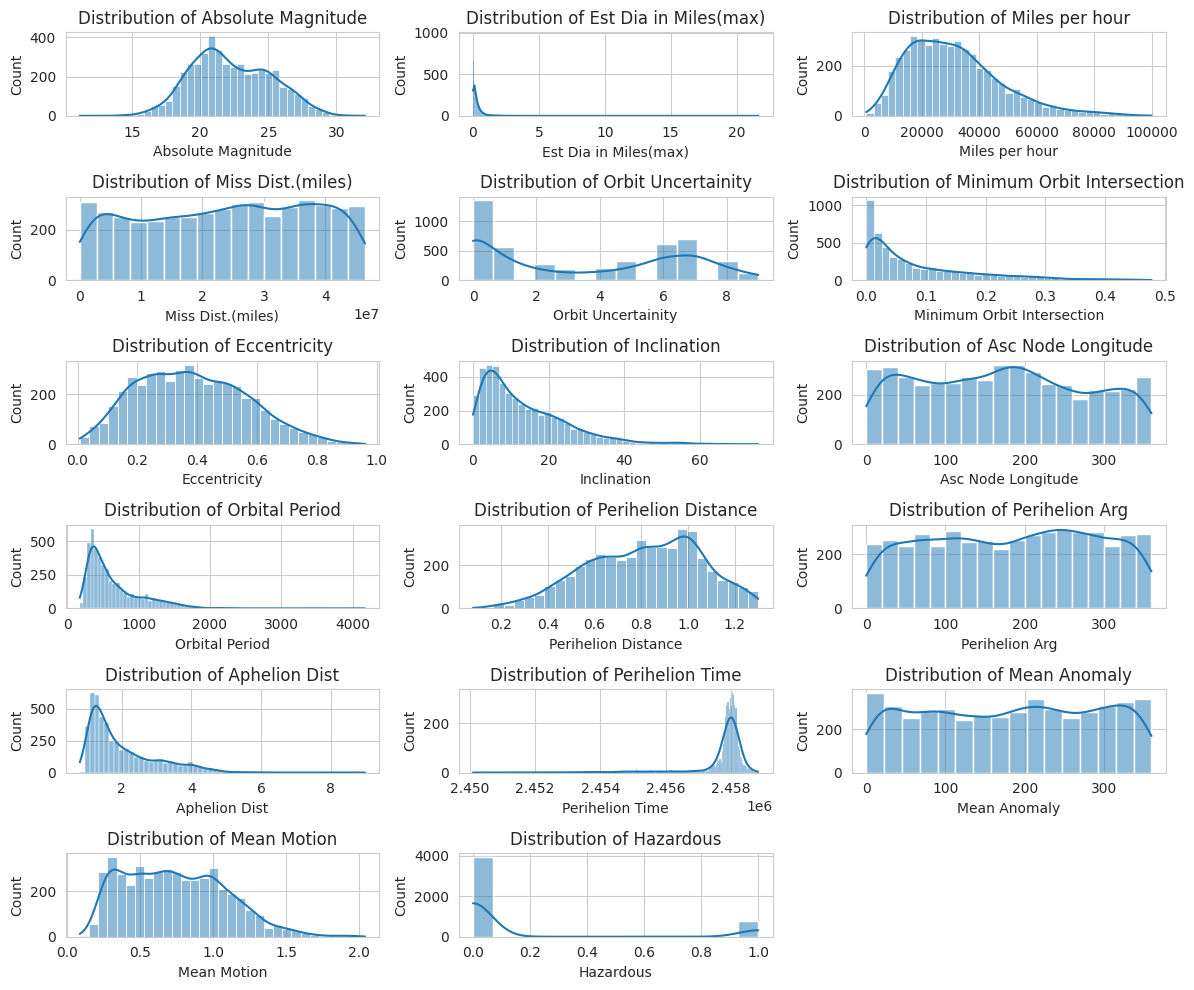

In [35]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## OUTLIERS

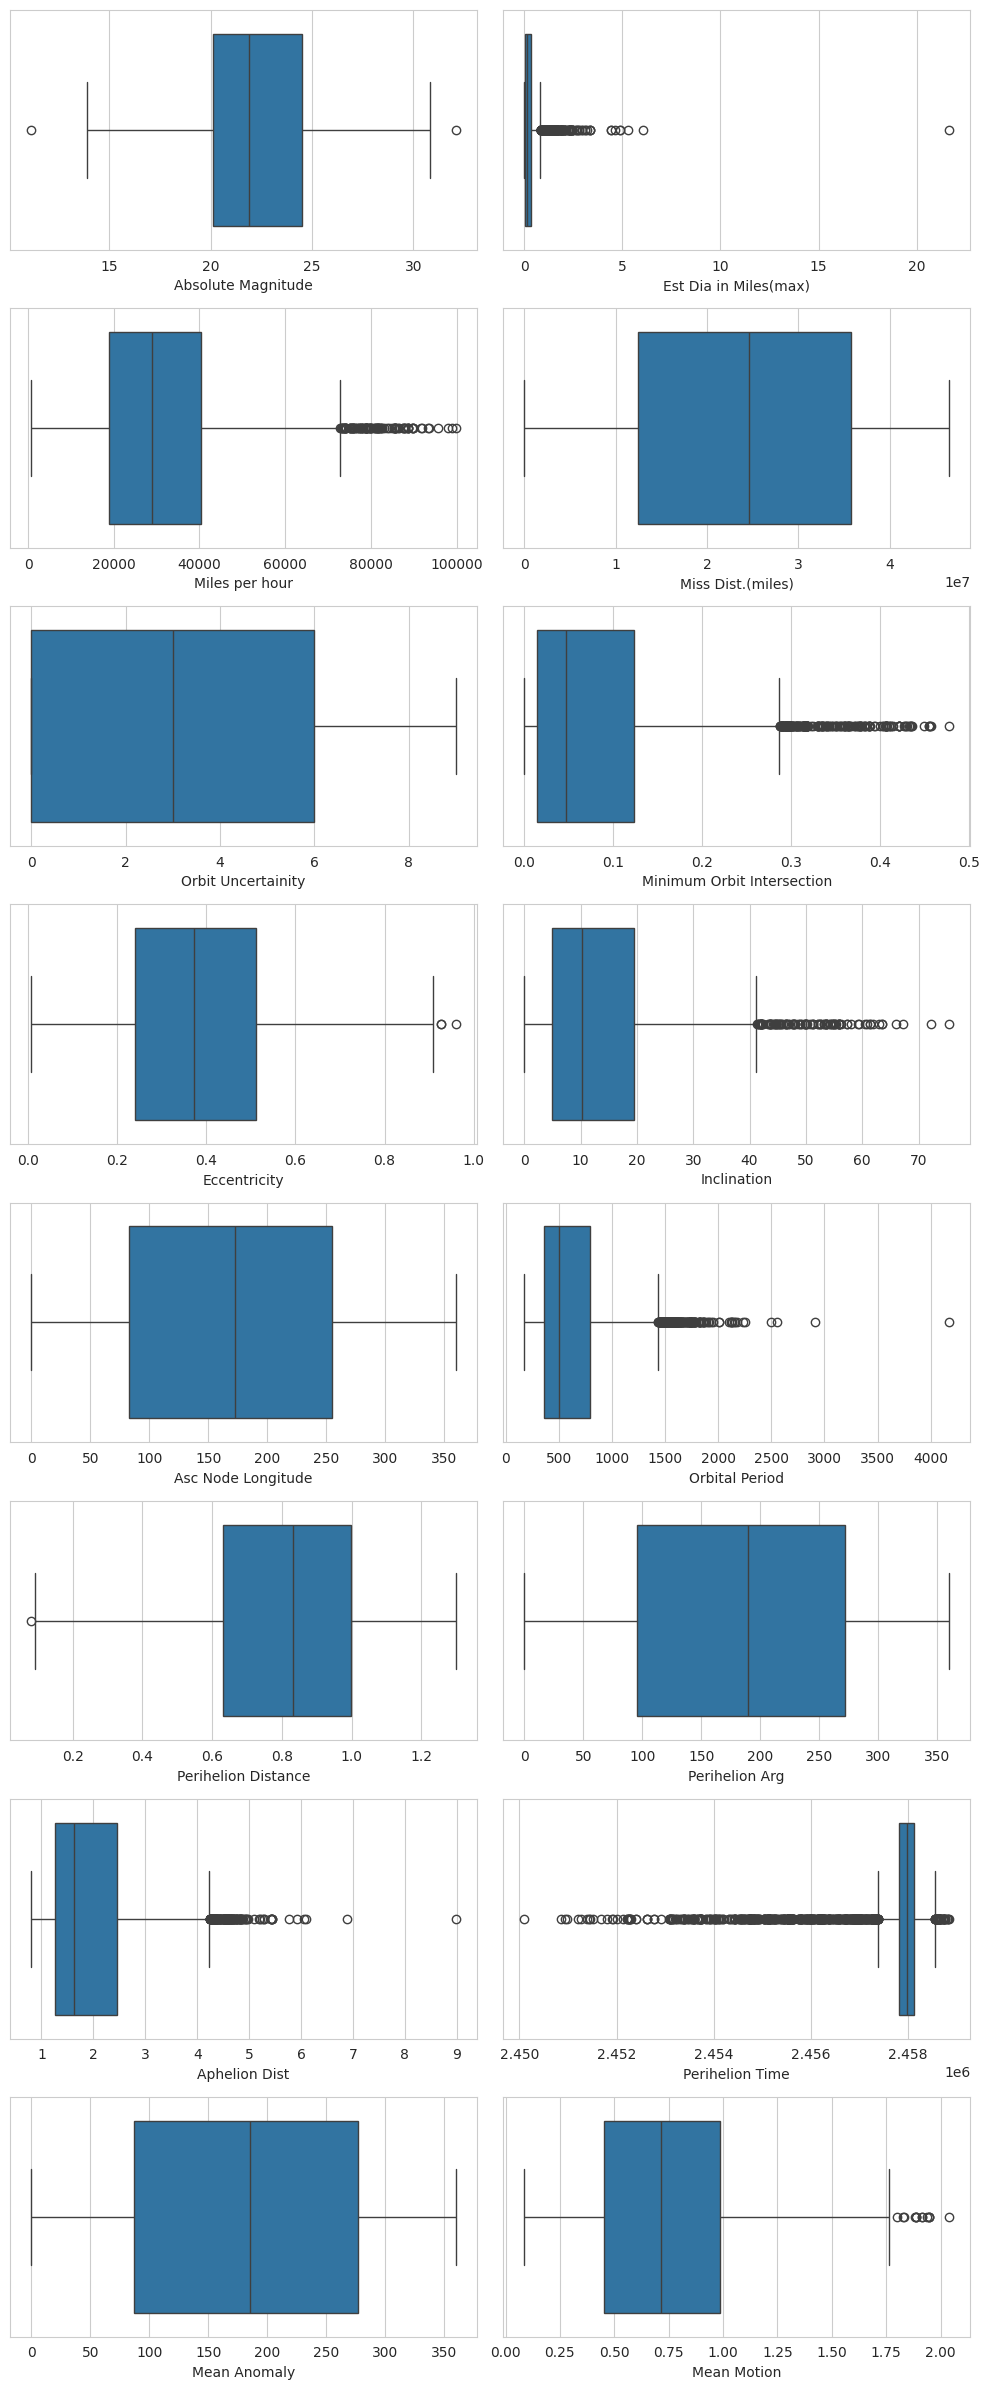

In [36]:
numerical_columns = ['Absolute Magnitude', 'Est Dia in Miles(max)', 'Miles per hour',
                     'Miss Dist.(miles)', 'Orbit Uncertainity',
                     'Minimum Orbit Intersection',
                    'Eccentricity', 'Inclination', 'Asc Node Longitude',
                     'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
                     'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']

n_cols = 2
import numpy as np

# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(numerical_columns)/n_cols))

# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()

for i, feature in enumerate(numerical_columns):
    sns.boxplot(data=df, x=feature, ax=ax[i])

# If the number of features is odd, remove the empty subplot
if len(numerical_columns) % 2 != 0:
    fig.delaxes(ax[-1])

plt.tight_layout()
plt.show(block=False)

In [37]:
df_outliers_rem = df[(df['Orbital Period'] <= 2500) &
                   (df['Est Dia in Miles(max)'] <= 10000) &
                   (df['Orbital Period'] <= 2500) &
                   (df['Perihelion Time'] > 2.451) &
                   (df['Inclination'] < 70) &
                   (df['Aphelion Dist'] <= 6) &
                   (df['Mean Motion'] <= 2500)]

df_outliers_rem.reset_index(inplace=True, drop=True)
df_outliers_rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681 entries, 0 to 4680
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Absolute Magnitude          4681 non-null   float64
 1   Est Dia in Miles(max)       4681 non-null   float64
 2   Miles per hour              4681 non-null   float64
 3   Miss Dist.(miles)           4681 non-null   float64
 4   Orbit Uncertainity          4681 non-null   int64  
 5   Minimum Orbit Intersection  4681 non-null   float64
 6   Eccentricity                4681 non-null   float64
 7   Inclination                 4681 non-null   float64
 8   Asc Node Longitude          4681 non-null   float64
 9   Orbital Period              4681 non-null   float64
 10  Perihelion Distance         4681 non-null   float64
 11  Perihelion Arg              4681 non-null   float64
 12  Aphelion Dist               4681 non-null   float64
 13  Perihelion Time             4681 

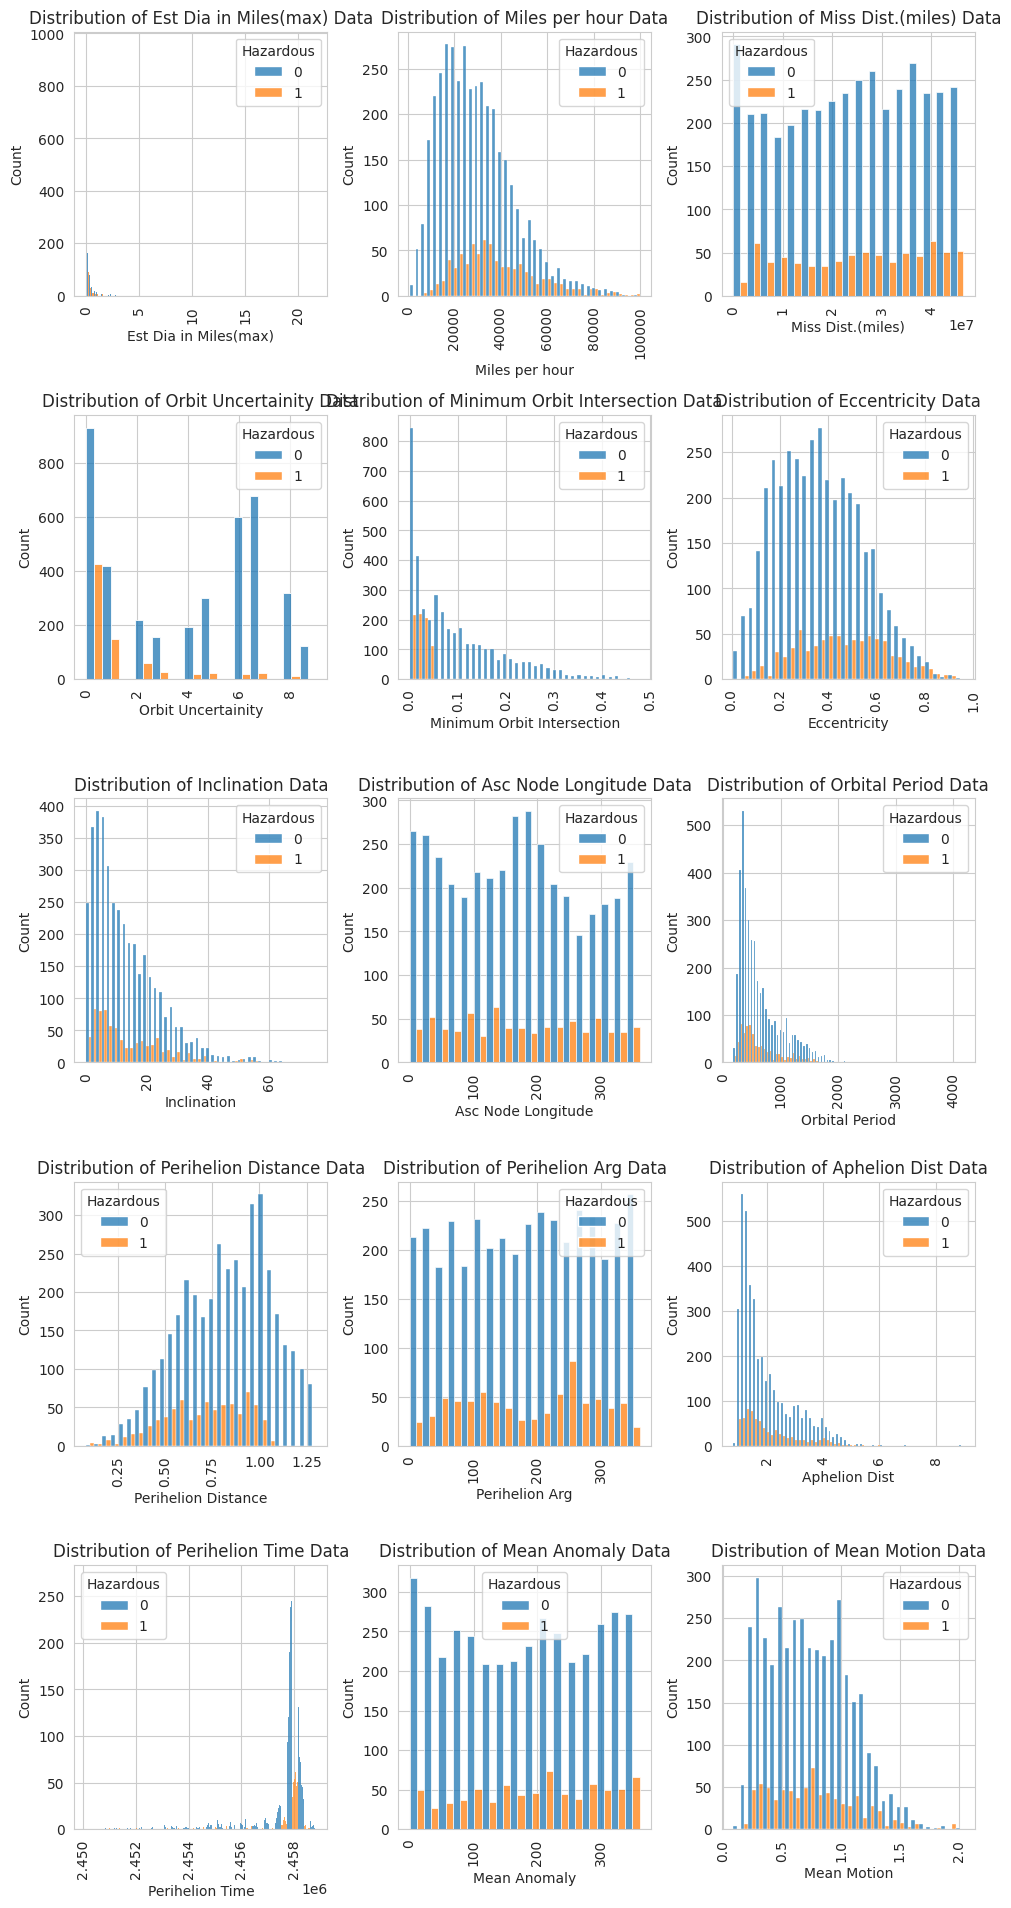

In [38]:
plt.figure(figsize = (10, 30))
for i, col in enumerate(df.columns[1:-1], 1):
    plt.subplot(8, 3, i)
    sns.histplot(x = df[col], hue = df["Hazardous"], multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

In [39]:
df_outliers_rem['Hazardous'].value_counts()

Hazardous
0    3927
1     754
Name: count, dtype: int64

## Label Encoding

In [40]:
lbl_enc = LabelEncoder()
df_outliers_rem.loc[:, 'Hazardous Encoded'] = lbl_enc.fit_transform(df_outliers_rem['Hazardous'])
df_outliers_rem['Hazardous Encoded'].value_counts()

<ipython-input-40-ae876e62b728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_rem.loc[:, 'Hazardous Encoded'] = lbl_enc.fit_transform(df_outliers_rem['Hazardous'])


Hazardous Encoded
0    3927
1     754
Name: count, dtype: int64

# Modelling

In [41]:
X = df_outliers_rem.drop(["Hazardous Encoded", "Hazardous"],axis=1)
y =df_outliers_rem['Hazardous Encoded']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [42]:
data_equals = X_train.equals(X_test)
if data_equals:
  print('Training and test data have same data')
else:
  print('Training and test data have different data')

Training and test data have different data


## Logistic Regression

In [43]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

Logistic Regression Accuracy: 0.8506


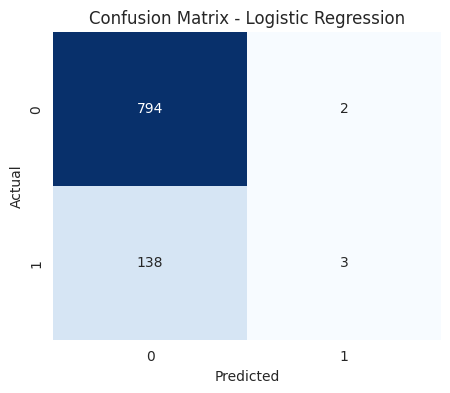

In [44]:
# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
class_report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report - Logistic Regression:\n", class_report_logreg)

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       796
           1       0.60      0.02      0.04       141

    accuracy                           0.85       937
   macro avg       0.73      0.51      0.48       937
weighted avg       0.81      0.85      0.79       937



## Decision Trees

In [46]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9903948772678762


In [55]:
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
# print("Decision Tree Cross-Validation Mean Accuracy:", dt_scores.mean())

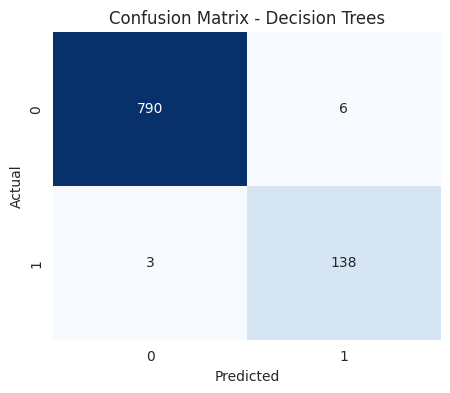

In [48]:
conf_matrix_dt = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
class_report_dt = classification_report(y_test, dt_pred)
print("Classification Report - Logistic Regression:\n", class_report_dt)

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       796
           1       0.96      0.98      0.97       141

    accuracy                           0.99       937
   macro avg       0.98      0.99      0.98       937
weighted avg       0.99      0.99      0.99       937



## XGBoost

In [50]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9946638207043756


In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]

xgb_model = XGBClassifier(random_state=42,
                          gamma=1,
                          max_depth=5,
                          min_child_weight=1,
                          learning_rate=0.1,
                          subsample=0.8,
                          colsample_bytree=0.8)
xgb_model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10, verbose=False)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

## Random Forest

In [51]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9967982924226254


In [ ]:
# Random Forest
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Mean Accuracy:", rf_scores.mean())

## SVC

In [ ]:
# from sklearn.svm import SVC

# # Train SVM model
# svm_model = SVC(kernel='linear', random_state=42)
# svm_model.fit(X_train, y_train)

# # Predictions
# y_pred_svm = svm_model.predict(X_test)

# # Accuracy
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print(f"SVM Accuracy: {accuracy_svm:.4f}")

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# KNN

In [53]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions for KNeighborsClassifier
y_pred_knn = knn_model.predict(X_test)

# Accuracy for KNeighborsClassifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNeighborsClassifier Accuracy: {accuracy_knn:.4f}")

KNeighborsClassifier Accuracy: 0.8111


# Gaussian

In [54]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predictions for GaussianNB
y_pred_gnb = gnb_model.predict(X_test)

# Accuracy for GaussianNB
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"GaussianNB Accuracy: {accuracy_gnb:.4f}")

GaussianNB Accuracy: 0.8399


In [56]:
from joblib import dump

In [ ]:
# Assuming your logistic regression model is named 'logreg_model'
# Save the model to a file
dump(logreg_model, 'logistic_regression_model.pkl')